In [42]:
from IPython.display import HTML

## . . This is where we load in various packages that are installed, but are not
## . .  automatically preloaded.  This is designed to keep Python lightweight as possible!

## . . Note that the "numpy as np" means that we are bringing the numpy package
## . . with the shortform "np" 
import numpy as np

## . . A powerful plotting library
import matplotlib.pyplot as plt

## . . This is an interesting user-committed and user-supported sound analysis library
import librosa
import librosa.display

## . . We will use this for the Audio function!
import IPython.display as ipd

## . . Import the signal processing components from the scipy library
from scipy import signal

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this Jupyter notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
''')

![title](data/TITLE.png)

### <h1><center>Module 4: An Introduction to Fourier Series</center></h1>

Let's start out our investigation into the world of Fourier by looking at [Fourier Series](https://en.wikipedia.org/wiki/Fourier_series).  First, to get an idea of the types of periodic signals we can represents with Fourier Series, let's first look at a data example.  The WAV file is an acoustic recording of a heartbeat over a 30s duration.  We are going to both plot the time series and listen to it (which is easy to do as part of the IPython's display function!).

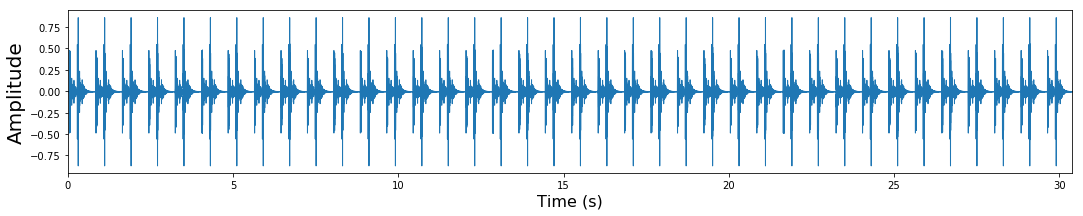

In [2]:
## . . Close previous plotting sessions
plt.close('all')

## . . Load in a wave file
## . . output two objects: (1) xx (a Numpy array) and the sampling rate sr (integer)
xx, sr = librosa.load('wav/heartbeat-05.wav')

## . . Define a new plot window with 12 (wide) and 3 (height0)
plt.figure(figsize=(18, 3))

## . . Pass in objects to one of librosa.displays functions to display data
librosa.display.waveplot(xx, sr=sr);

## . . Let's label our axes
plt.xlabel('Time (s)',fontsize=16)
plt.ylabel('Amplitude',fontsize=20)

plt.show()

**Figure 1. Illustration of a digital signal of a recorded heart beat.**

Let's now listen to this audio file. How would you go about characterising the heart-beat signal?

In [4]:
ipd.Audio(xx, rate=sr) 

# Fourier Series

The mathematical formulation of **Fourier Series** is used for a variety of purposes.  These can include

* Representing **continuous-time periodic** signals such as the heart beat example from above, the tick-tock of a clock, and geophysical instrument output signals such as EM square waves.


* Expressing **periodic** signals using **harmonically related sinusoids** (i.e., $\sin$ and $\cos$) defined by angular frequencies $\{...,-2\omega_0,-\omega_0,0,\omega_0,2\omega_0,...\}$ where $\omega_0$ is called the **fundamental angular frequency** and only takes on discrete values, i.e.,  $k\omega_0$ where $k$ is an integer and $-\infty<k<\infty$.
    
    
* computing and studying Fourier Series for the purpose of [harmonic analysis](https://en.wikipedia.org/wiki/Harmonic_analysis) such as in vibration analysis or environmental sound monitoring.

While the Fourier Series is used to represent only periodic signals, as we will see in later classes that it may be generalized into the **Fourier transform**.  This is one of the most useful transforms that you will experience in your geophysical careers.  But first, let's look at two key concepts: **perodicity** and **superposition**.

## Periodicity

A *continuous-time* function $x(t)$ is said to be [periodic](https://en.wikipedia.org/wiki/Periodic_function) if there exists a constant $T>0$ such that:

$$ x(t) = x(t+T), \quad t\in(-\infty,\infty). \tag{1} $$ 

The smallest $T$ for which the relationship in equation 1 holds is called the **fundamental period**.  The **fundamental angular frequency**, $\omega_0$, is related to $T$ by:

$$ \omega_0 = \frac{2\pi}{T}. \tag{2}$$

Note that because we have defined $\omega = 2\pi f$, the **fundamental frequency** is given by $f_0=1/T$.  You also have to be careful when people talk about "the frequency".  Normally this means the fundamental frequency (but not always) - so it's good to ask. 

The example below shows that a single $x(t) = \sin 8\pi t$ wave has multiple periodicities; however, the fundamental period is given by $T=0.25$s and thus the fundamental frequency is given by $f = 1/T = 1/0.25s=4$Hz.

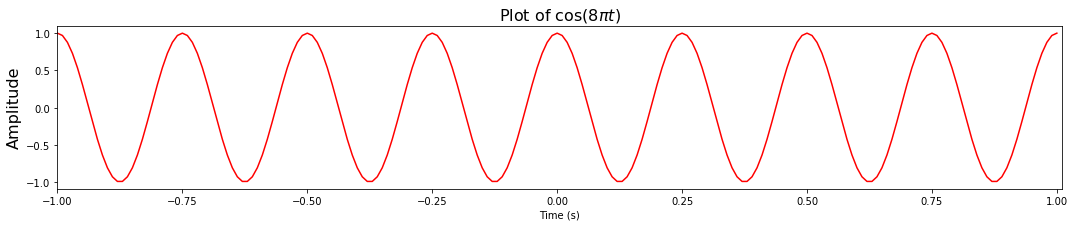

In [4]:
# . . Set up NumPy array with between 0s and 2s with sampling 0.005s
tmin,tmax,dt,pi = -1.0,1.01,0.01,np.pi # Minimum and maximum t values, sampling rate and pi definition

# . . Assigne time line
t = np.arange(tmin, tmax, dt) 

# . . Define our x(t)
x=np.cos(8*np.pi*t)

# red dashes, blue squares and green triangles
plt.figure(figsize=(18, 3))
plt.plot(t,x, 'r-')              # . . Plot x(t) as a red line
plt.xlabel('Time (s)')           # . . X label
plt.ylabel('Amplitude',fontsize=16)  # . . Y label
plt.title('Plot of cos$(8\pi t)$',fontsize=16) # . . Title
plt.axis([tmin,tmax,1.1*x.min(),1.1*x.max()]) # . . Set plot axis
plt.show()                       # . . Show plot below

**Figure 2. Illustration of of signal $x(t) = \sin 8\pi t$ wave having multiple periodicities; however, the fundamental period is given by $T=0.25$s and thus the fundamental frequency is given by $f = 1/T = 1/0.25s=4$Hz.**

## Superposition

From straightforward individual sinusoids we can build up much more complicated periodic waveforms by taking weighted sums over the various sinusoids.  In fact, every continuous-time periodic function can be expanded into a **complex Fourier Series** as:
<div class="alert alert-info">
$$ x(t) = \sum_{k=-\infty}^{\infty} C_k {\rm e}^{i k \omega_0 t}=\sum_{k=-\infty}^{\infty} C_k {\rm e}^{i k 2\pi t/T}, \tag{3}$$
</div>

where the **Fourier Series coefficients**, $\{C_k\}$, are given by an **inversion formula**:
<div class="alert alert-info">
$$ C_k = \frac{1}{T} \int_{-T/2}^{T/2} x(t) \,{\rm e}^{-i k \omega_0 t} {\rm d}t= \frac{1}{T} \int_{-T/2}^{T/2} x(t) \,{\rm e}^{-i k 2\pi t/T} {\rm d}t, \quad k=...,-2,-1,0,1,2, ...  \tag{4}$$
</div>

Note that while ${\rm e}^{i k \omega_0 t}$ may not immediately look like sinusoids, you can apply Euler's formula $\left(\cos\, \theta = \frac{\mathrm{e}^{i\theta}+\mathrm{e}^{-i\theta} }{2} \,{\rm and} \sin\, \theta = \frac{\mathrm{e}^{i\theta}-\mathrm{e}^{-i\theta} }{2i}\right)$ to turn the complex exponential into $\sin$ and $\cos$ terms.  Below is an example of what a Fourier Series would be for a situation where $T=1$s and we have some randomly generated integer coefficients:

$$[...,C_{-1},C_{0},C_1,C_2,C_3,C_4,C_5,...]=[...,0,-5,8,6,4,2,0,...]$$

where all other coefficients are zero.  The first panel plots the superposition of just the $C_0$ and $C_1$ coefficients. The second panel shows $C_0$, $C_1$ and $C_2$.  The third panel shows $C_0$, $C_1$, $C_2$ and $C_3$.  The fourth panel shows $C_0$, $C_1$, $C_2$, $C_3$ and $C_4$.  

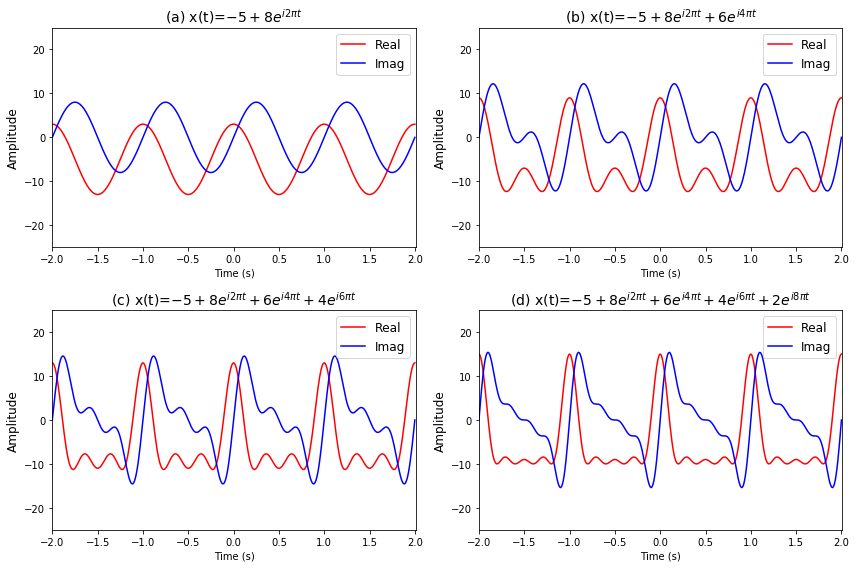

In [20]:
## . . Define plotting function to optim
def plot_my_fig(t,x,caption):
    plt.plot(t,np.real(x),'r-',t,np.imag(x),'b-')          
    plt.xlabel('Time (s)')           # . . X label
    plt.ylabel('Amplitude',fontsize=12)  # . . Y label
    plt.title(caption,fontsize=14) # . . Title
    plt.axis([tmin,tmax,-25,25]) # . . Set plot axis
    plt.legend(['Real','Imag'],fontsize=12)

# . . Set up NumPy array with between 0s and 2s with sampling 0.005s
tmin,tmax,dt = -2.0,2.01,0.01 # Minimum and maximum t values, sampling rate and pi definition

# . . Assigne time line
t = np.arange(tmin, tmax, dt) 

# . . Assign a fundamental period
T = 1.0

# . . Define our x(t)
x0=-5
x1=8*np.exp(1j*2*np.pi*t/T)
x2=6*np.exp(1j*4*np.pi*t/T)
x3=4*np.exp(1j*6*np.pi*t/T)
x4=2*np.exp(1j*8*np.pi*t/T)
x = x0+x1+x2+x3+x4

# red dashes, blue squares and green triangles
plt.figure(figsize=(12,8))
plt.subplot(221)
plot_my_fig(t,x0+x1,'(a) x(t)=$-5+8e^{i2\pi t}$')

plt.subplot(222)
plot_my_fig(t,x0+x1+x2,'(b) x(t)=$-5+8e^{i2\pi t}+6e^{i4\pi t}$')

plt.subplot(223)
plot_my_fig(t,x0+x1+x2+x3,'(c) x(t)=$-5+8e^{i2\pi t}+6e^{i4\pi t}+4e^{i6\pi t}$')

plt.subplot(224)
plot_my_fig(t,x,'(d) x(t)=$-5+8e^{i2\pi t}+6e^{i4\pi t}+4e^{i6\pi t}+2e^{i8\pi t}$')

plt.tight_layout() # . . Make it so that the subplots don't overlap
plt.show()                       # . . Show plot below

**Figure 3. Illustration of the superposition of (a) 2, (b) 3, (c) 4 and (d) 5 terms in a Fourie series.  Note that even when we are introducing higher frequencies, the fundamental period $T$ of the series remains the same.**

Notice that the shape of the signal repeats with the fundamental periodicity of $T=1$s **regardless of the number of higher-order terms added**! This is a basic illustration of a Fourier series. Of course, we want to be able to represent signals that have a certain shape given by $x(t)$.  In this case we have to use the inversion formula to recover what the $C_k$ values will approximate the desired $x(t)$. 

A natural question might be how many different $\{C_k\}$ coefficients are required to "accurately represent" a given signal?  Generally speaking, this will depend on the signal's structure.  In the most basic example, a single sinusoid will require one coefficient. Similarly, a relatively smooth signal (usually) will require superimposing fewer $\{C_k\}$ terms than a signal with "sharp features" (e.g., a corner discontinuity), which will require a very large (or, in fact, an infinite) number of $\{C_k\}$ terms.  We will look at an example below.

### What are these $\{C_k\}$ coefficients?

The sequence of coefficients $\{C_k\}$ characterize a **frequency-domain representation** that **uniquely** corresponds to the time-domain signal $x(t)$.  In addition, you should note that time-domain signal in Figure 1 is both **continuous and periodic**, while the frequency-domain representation is **discrete and aperiodic**!  You will notice that a lot of interesting symmetries occur when looking at **conjugate domains** (i.e., time and frequency).

<img src="Fig/2-Fourier Series_FINAL.png" width="500">

**Figure 4.  Illustrating the relationship between a continuous and periodic time-domain signal and a discrete set of coefficients in the frequency domain.  The equations also give the formula by which one can be computed or reconstructed from values in the other domain.**

You can also ask yourself: "What happens if I **squeeze** the time series on the left to make $T$ smaller?" Because $\omega_0=2\pi/T$, we see that this effectively **stretches** the frequency content on the left.  That is, it moves the frequency structure higher.  Conversely, if we **stretch** the time series, this will **squeeze** the frequency domain and move the frequencies lower.  

You might note that in the limit that the time series is stretched out to **infinity** (i.e., $T\rightarrow\infty$) this effectively creates a **continuum** in the frequency domain.  In essence, this is what we do when we develop the theory of the **Fourier Transform**.  More on this in the next set of notes.


## Magnitude and phase

Now that we are back into "complex subject matter", it is helpful to make a connection to the discussion in the previous lectures on complex numbers.  Generally speaking, coefficients $\{C_k\}$ are **complex-valued** quantities, and we often use **magnitude and phase** for its representation.

<img src="Fig/2.1 phase_and_mag_final.png" width="500">

**Figure 5.  Illustration of the connection between x and y, and magnitude and phase. Note that engineering disciplines commonly use $j$ for the imaginary unit, while $i$ is the preferred usage in mathematics and applied physics fields.**

Mathematical expressions for these terms are given by the following.  The **magnitude**, always a positive and real quantity, is given by:

$$|C_k| = \sqrt{(\Re{\{C_k}\})^2+(\Im{\{C_k}\})^2} \tag{5}$$

while the **phase** is represented by ($\angle$ denotes angle):

$$\angle (C_k) = {\rm tan}^{-1} \left( \frac{\Im{\{C_k}\} }{\Re{\{C_k}\}} \right). \tag{6}$$

Thus, the physical meaning of the **Fourier magnitude** and **Fourier phase** is nothing more than the **modulus** and **argument** of a **complex number** that we discussed in the previous chapter. In these expressions $\Re$ and $\Im$ are again the real and imaginary operators:

$$
\Re(z) = \Re(x+iy)=x \quad {\rm and} \quad \Im(z) = \Im(x+iy)=y. \tag{7}
$$

Many mathematical software packages differentiate will provide the equivalent of an $\mathrm{atan2}(y,x)$ function that gives you a four quadrant phase representation. 

# Trigonometric Fourier Series 

There is another Fourier Series representations that you will likely encounter involving **trigonometric** $\sin$ and $\cos$ functions:

$$
f(t) = \sum_{k=-\infty}^{\infty} a_k {\rm cos} (k\omega_0 t) + b_k {\rm sin} (k\omega_0 t), \tag{8}
$$

where $a_k$ and $b_k$ are coefficients that are related to the $C_k$ in equation 3 and 4.  Recognising that the $\cos$ function is even (i.e., ${\rm cos}(-x) = {\rm cos}(x)$) and that the $\sin$ function is odd (i.e., ${\rm sin} (-x) = - {\rm sin} (x)$), one may rewrite equation 8 as: 

<div class="alert alert-info">
$$
f(t) = \frac{A_0}{2} + \sum_{k=1}^{\infty} A_k {\rm cos} (k\omega_0 t) + B_k {\rm sin} (k\omega_0 t), \tag{9}
$$
</div>
where, in general, $A_k \neq a_k$ and $B_k \neq b_k$.  

**Extension Question:** Show that equations 8 and 9 are equivalent by establishing the relationship between the two sets of coefficients.

### Inversion formula for Trigonometeric  Fourier Series

**Fourier series**  consisting of only $\cos$ and $\sin$ terms will occur for even and odd waveforms, respectively.  Waveforms that are neither even nor odd generally will have both $\cos$ and $\sin$ terms.  The **inversion formula** for the Fourier series coefficients are given by

<div class="alert alert-info">
$$
\begin{eqnarray}
A_0 &=& \frac{2}{T}\int_{-T/2}^{T/2} f(t) \,{\rm d}t  \tag{10}\\
A_k &=& \frac{2}{T}\int_{-T/2}^{T/2} f(t) \,{\rm cos}(k\omega_0 t) \,{\rm d}t \tag{11} \\
B_k &=& \frac{2}{T}\int_{-T/2}^{T/2} f(t) \,{\rm sin}(k\omega_0 t) \, {\rm d}t \tag{12}
\end{eqnarray}
$$
</div>

One can establish the equivalence of the trigonometric and complex exponential Fourier Series by applying **de Moivre's relationship**.


## Orthogonality of $\sin$ and $\cos$ integrals

An importance question that comes to mind when looking at equations 10-12 is: "what happens if $f(t)$ is composed of number of superposition of sinusoids?".  To answer this question directly we can turn to the  [orthogonality](https://en.wikipedia.org/wiki/Orthogonal_functions) of $\cos$ and $\sin$ integrals.

**Q:** Prove the orthogonality relationships of $\cos$ and $\sin$ functions over $[-T/2,T/2]$ where $T$ is the fundamental period.

**A:** For any $n\neq0$ and with $\omega_0=\frac{2\pi}{T}$ we have

$$ \int_{-T/2}^{T/2} \mathrm{cos}\,(n\omega_0 t) \,\mathrm{d}t = \left[ \frac{\mathrm{sin}\,(n\omega_0 t)}{n\omega_0}  \right]_{-T/2}^{T/2}=0 \tag{13}$$

$$ \int_{-T/2}^{T/2} \mathrm{sin}\,(n\omega_0 t) \,\mathrm{d}t = \left[- \frac{\mathrm{cos}\,(n\omega_0 t)}{n\omega_0}  \right]_{-T/2}^{T/2}=0 \tag{14}$$

$$ \int_{-T/2}^{T/2} \mathrm{cos}^2(n\omega_0 t) \,\mathrm{d}t = 2\int_{0}^{T/2} \frac{1+\mathrm{cos}(2n\omega_0 t)}{2} \,\mathrm{d}t = \left[ t+\frac{\mathrm{sin}\,(2 n\omega_0 t)}{2 n\omega_0}  \right]_{0}^{T/2}= \frac{T}{2} \tag{15}$$

$$ \int_{-T/2}^{T/2} \mathrm{sin}^2(n\omega_0 t) \,\mathrm{d}t = 2\int_{0}^{T/2} \frac{1-\mathrm{cos}(2n\omega_0 t)}{2} \,\mathrm{d}t = \left[ t-\frac{\mathrm{sin}\,(2 n\omega_0 t)}{2 n\omega_0}  \right]_{0}^{T/2}= \frac{T}{2} \tag{16}$$

Equations 20-22 rely on the following three identities:

$$\mathrm{cos}(\alpha)\,\mathrm{cos}(\beta) = \frac{1}{2}\left[\mathrm{cos}(\alpha+\beta)+\mathrm{cos}(\alpha-\beta)\right] \tag{17} $$

$$\mathrm{sin}(\alpha)\,\mathrm{sin}(\beta)  = \frac{1}{2}\left[\mathrm{cos}(\alpha-\beta)-\mathrm{cos}(\alpha+\beta)\right] \tag{18} $$

$$\mathrm{sin}(\alpha)\,\mathrm{cos}(\beta)  = \frac{1}{2}\left[\mathrm{sin}(\alpha+\beta)+\mathrm{sin}(\alpha-\beta)\right] \tag{19}$$

For $n\neq m$ (and $n,m\neq0$) we have

$$ \int_{-T/2}^{T/2} \mathrm{cos}(m\omega_0 t) \,\mathrm{cos}(n\omega_0 t) \,\mathrm{d}t = \frac{1}{2}\int_{-T/2}^{T/2} \left[\mathrm{cos}((m+n)\omega_0 t)+\mathrm{cos}((m-n)\omega_0 t)\right] \,\mathrm{d}t = 0 \tag{20}$$

$$ \int_{-T/2}^{T/2} \mathrm{sin}(m\omega_0 t) \,\mathrm{sin}(n\omega_0 t) \,\mathrm{d}t = \frac{1}{2}\int_{-T/2}^{T/2} \left[\mathrm{cos}((m-n)\omega_0 t)-\mathrm{cos}((m-n)\omega_0 t)\right] \,\mathrm{d}t = 0 \tag{21}$$

$$ \int_{-T/2}^{T/2} \mathrm{cos}(m\omega_0 t) \,\mathrm{sin}(n\omega_0 t) \,\mathrm{d}t = \frac{1}{2}\int_{-T/2}^{T/2} \left[\mathrm{sin}((m+n)\omega_0 t)+\mathrm{sin}((m-n)\omega_0 t)\right] \,\mathrm{d}t = 0 \tag{22}$$

Now let's create a numerical test to help confirm/validate our analytic approach! To do this, let's use [numerical quadrature](https://en.wikipedia.org/wiki/Numerical_integration) functions of the Scipy package.

In [6]:
# . . Important the numerical quadrature component from scipy.integrate package
from scipy.integrate import quad

# . . Define which m and n coefficients we are looking at in Eq 2.1.20-2.1.22
m,n = 4,4
    
# . . Define inline cos-cos functions that can be passed to the quad rule
def cos_cos_integrand(x):
    return np.cos(m*x)*np.cos(n*x)

# . . Define inline sin-sin functions that can be passed to the quad rule
def sin_sin_integrand(x):
    return np.sin(m*x)*np.sin(n*x)

# . . Define inline cos-sin functions that can be passed to the quad rule
def cos_sin_integrand(x):
    return np.cos(m*x)*np.sin(n*x)

## . . Test cos cos integrand and print result in double precision
ans, err = quad(cos_cos_integrand, -np.pi,np.pi)
print('The cos-cos integral result is:',ans)

## . . Test sin sin integrand and print resultin floating point
ans, err = quad(sin_sin_integrand, -np.pi,np.pi)
print('The sin-sin integral result is: %f'%ans)

## . . Test cos sin integrand and print results in expontential notation
ans, err = quad(cos_sin_integrand, -np.pi,np.pi)
print('The cos-sin integral result is: %e'%ans)


The cos-cos integral result is: 3.141592653589793
The sin-sin integral result is: 3.141593
The cos-sin integral result is: 0.000000e+00


Let's also investigate this graphically:

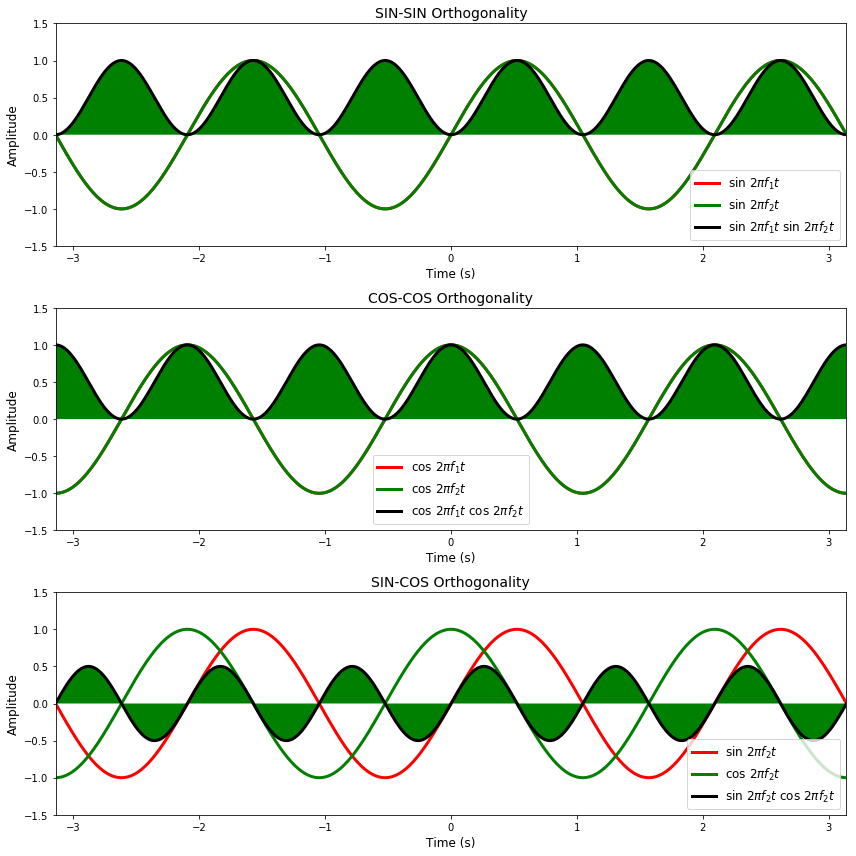

In [36]:
def plot_orthog(t,f1,f2,caption):
    plt.plot(t,f1, 'r-',t,f2,'g-',linewidth=3) 
    plt.plot(t,f1*f2, 'k-',linewidth=3) 
    plt.fill_between(t,f1*f2, where=np.abs(f1*f2) >= 0, facecolor='green', interpolate=True)
    plt.xlabel('Time (s)',fontsize=12)           
    plt.ylabel('Amplitude',fontsize=12)  
    plt.title(caption,fontsize=14) 
    plt.axis([t.min(),t.max(),-1.5,1.5]) 

## . . Define two frequencies
m = 3 # integer
n = 3 # integer multiple
f1=m/(2*np.pi) # Frequency of signal 1 (in Hz)
f2=n/(2*np.pi) # Frequency of signal 2 (in Hz)

# Set up variables for arrays
tmin,tmax,dt = -np.pi,np.pi,0.01 

# . . Define time
t = np.arange(tmin, tmax, dt) 

# . . Make signals
s1,s2,c1,c2 = np.zeros(t.size),np.zeros(t.size),np.zeros(t.size),np.zeros(t.size) 
s1 = np.sin(2*np.pi*f1*t)
s2 = np.sin(2*np.pi*f2*t)
c1 = np.cos(2*np.pi*f1*t)
c2 = np.cos(2*np.pi*f2*t)

# . . Set plot size
plt.figure(figsize=(12, 12))
plt.subplot(311)
plot_orthog(t,s1,s2,'SIN-SIN Orthogonality')
plt.legend(['sin $2\pi f_1 t$','sin $2\pi f_2 t$','sin $2\pi f_1 t$ sin $2\pi f_2 t$'],fontsize=12)

plt.subplot(312)
plot_orthog(t,c1,c2,'COS-COS Orthogonality')
plt.legend(['cos $2\pi f_1 t$','cos $2\pi f_2 t$','cos $2\pi f_1 t$ cos $2\pi f_2 t$'],fontsize=12)

plt.subplot(313)
plot_orthog(t,s2,c2,'SIN-COS Orthogonality')
plt.legend(['sin $2\pi f_2 t$','cos $2\pi f_2 t$','sin $2\pi f_2 t$ cos $2\pi f_2 t$'],fontsize=12)

plt.tight_layout() # . . Make it so that the subplots don't overlap
plt.show()

**Figure 6. Figure illustrating the orthogonality of $\cos$ and $\sin$ signals. The red and green lines show the two functions, while the black line shows it product.  The solid green area is the area under the curve, the sum of which shows the value of the integral. Top: Orthogonality test for $\cos 2\pi f_1 t$ and $\cos 2\pi f_2 t$. Middle: Orthogonality test for $\sin 2\pi f_1 t$ and $\sin 2\pi f_2 t$. Bottom:  Orthogonality test for $\sin 2\pi f_1 t$ and $\cos 2\pi f_2 t$.  It is instructive to rerun the code with different values of integers $m$ and $n$.**

###  Example 1 - Basic *cos* signal

**Q:** Find the **complex exponential Fourier series coefficients** for $x(t)={\rm cos}(10\,\pi\,t)+{\rm cos}(20\,\pi\,t)$:
   

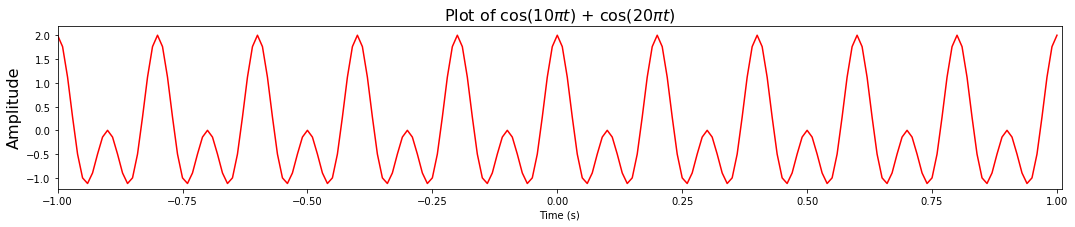

In [37]:
# . . Set up NumPy array with between 0s and 2s with sampling 0.005s
tmin,tmax,dt = -1.0,1.01,0.01 # Minimum and maximum t values, and sampling rate

# . . Assigne time line
t = np.arange(tmin, tmax, dt) 

# . . Assign local variable from NumPy's version
pi = np.pi

# . . Define our x(t)
x=np.cos(10*pi*t)+np.cos(20*pi*t)

# red dashes, blue squares and green triangles
plt.figure(figsize=(18, 3))
plt.plot(t,x, 'r-')              # . . Plot x(t) as a red line
plt.xlabel('Time (s)')           # . . X label
plt.ylabel('Amplitude',fontsize=16)  # . . Y label
plt.title('Plot of cos$(10\pi t)$ + cos$(20 \pi t)$',fontsize=16) # . . Title
plt.axis([tmin,tmax,1.1*x.min(),1.1*x.max()]) # . . Set plot axis
plt.show()                       # . . Show plot below

**Figure 7.  Illustrating superposition of $\cos 10\pi t$ and $\cos 20\pi t$.**

**A:** It is clear that the fundamental angular frequency of $x(t)$ is $\omega_0=10\pi$ (or $f_0=5$ Hz).  The fundamental period is thus equal to $T_p=2\pi/\omega_0=1/5$s, which is validated:

$$
\begin{eqnarray}
x\left(t+\frac{n}{5}\right) & = & {\rm cos} \left(10\pi\left(t+\frac{n}{5}\right)\right)+{\rm cos} \left(20\pi\left(t+\frac{n}{5}\right)\right), n=\pm 1,2,3,...\\
\, &=& {\rm cos} \left(10\pi t + 2\pi n \right) + {\rm cos} \left(20\pi t+4\pi n\right), n=\pm 1,2,3,... \tag{26}\\
\, &=& {\rm cos} \left(10\pi t\right) + {\rm cos} \left( 20\pi t\right) = x(t).
\end{eqnarray}
$$

and therefore satisfies the periodicity requirement.  **NOTE: This is a good test to remember because it is a necessary test to demonstrate that $T$ is the fundamental period.**  Now with the use of Euler formulae, we can express $x(t)$ as:

$$
\begin{eqnarray}
x(t) & = & {\rm cos}(10\pi t)+{\rm cos}(20\pi t) \\
\,   & = & \frac{{\rm e}^{i\omega_0 t} + {\rm e}^{-i \omega_0 t}}{2} +\frac{{\rm e}^{2 i\omega_0 t} + {\rm e}^{-2i\omega_0 t}}{2} \\
\, & = & \frac{1}{2}{\rm e}^{-2i\omega_0 t}+\frac{1}{2}{\rm e}^{-i\omega_0 t}+\frac{1}{2}{\rm e}^{i\omega_0 t}+\frac{1}{2}{\rm e}^{2i\omega_0 t}
\end{eqnarray}
\tag{27}
$$

By inspection and use of equation 4, we have $C_{-2}=C_{-1}=C_1=C_2=1/2$.  All other $C_k$ are equal to zero.

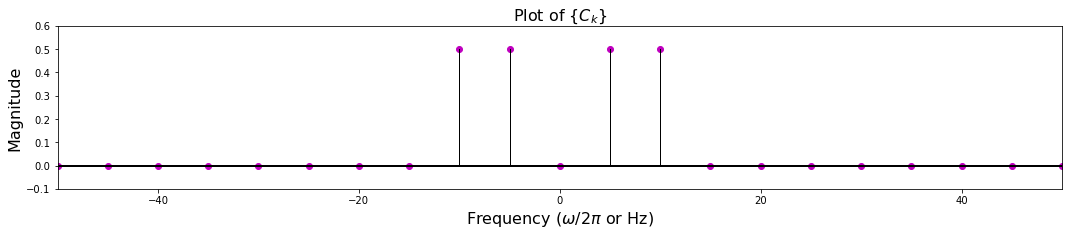

In [4]:
# . . Show the Fourier coefficients 
wmax=100*pi; # . . Set a maximum value
w0=10*pi; 
w = np.arange(-wmax,wmax+w0,w0)
f = 0.*w;
f[8:10]=1/2;
f[11:13]=1/2

# . . Show plot of coefficients using the stem plotting technique
plt.figure(figsize=(18, 3))
markerline, stemlines, baseline = plt.stem(w/(2*pi), f,'-.')      # . . returns 3 objects 
plt.setp(baseline, 'color', 'k', 'linewidth', 2)                  # . . Adjust the y=0 baseline
plt.setp(stemlines, 'color', 'k', 'linewidth', 1,'linestyle','-') # . . Adjust stem lines black (k) and solid (-)
plt.setp(markerline, 'color', 'm')                                # . . Adjust marker dots to be magenta (m)
plt.xlabel('Frequency ($\omega/2\pi$ or Hz)',fontsize=16)         # . . X label
plt.ylabel('Magnitude',fontsize=16)                               # . . Y label
plt.title('Plot of $\{C_k\}$',fontsize=16)                        # . . Title
plt.axis([-wmax/(2*pi),wmax/(2*pi),-0.1,0.6])                     # . . Set plot axis
plt.show()                                                        # . . Show plot

**Figure 8. Illustration of the coefficients of the signal in Figure 7.**

### Example 2 - A more complex trigonometric signal

**Q:** Find the **complex exponential Fourier Series** coefficients for 

$$x(t) = 1+{\rm sin} (\omega_0 t)+2{\rm cos} (\omega_0 t)+{\rm cos} (3\omega_0 t+\pi/4)$$

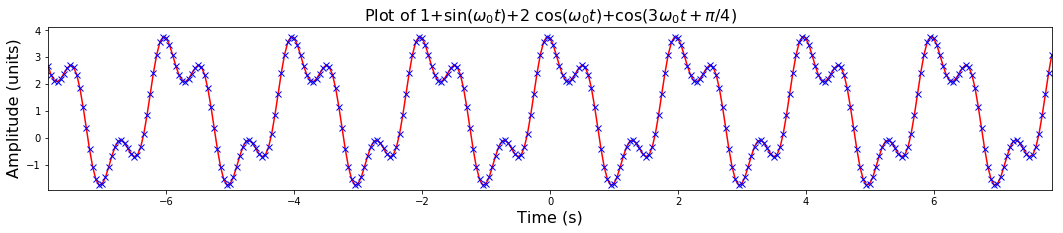

In [10]:
## . . Close previous plotting sessions
plt.close('all')

# . . Values for tline
tmin,tmax,dt = -2.5*np.pi,2.5*np.pi,0.05

# . . Define time axis
t = np.arange(tmin, tmax, dt) 

# . . Define fundamental frequency
w0=1.*pi # . . Set arbitrarly at 1 Hz ($pi$ rads)

# . . Define our x(t)
x=1+np.sin(w0*t)+2.0*np.cos(w0*t)+np.cos(3*w0*t+pi/4.);

# red dashes, blue squares and green triangles
plt.figure(figsize=(18, 3))
plt.plot(t,x, 'r-',t,x,'bx')              # . . Plot x(t) as a red line
plt.xlabel('Time (s)',fontsize=16)           # . . X label
plt.ylabel('Amplitude (units)',fontsize=16)  # . . Y label
plt.title('Plot of 1+sin$(\omega_0 t)$+2 cos$(\omega_0 t)$+cos$(3\omega_0 t+\pi/4)$',fontsize=16) # . . Title
plt.axis([tmin,tmax,1.1*x.min(),1.1*x.max()]) # . . Set plot axis
plt.show()      

**Figure 9.  Illustration of the signal $f(t)=1+sin(\omega_0 t)$+2 cos$(\omega_0 t)$+cos$(3\omega_0 t+\pi/4)$ both in a continuous (red line) and sampled (blue x) form.**

**A:** With use of Euler formulae, we can expand out each term in the function $x(t)$ to write:

$$
\begin{eqnarray}
x(t) &=& 1+\left(1+\frac{1}{2i}\right){\rm e}^{i\omega_0 t}+
\left(1-\frac{1}{2i}\right){\rm e}^{-i\omega_0 t}+
\frac{1}{2} {\rm e}^{i\pi/4}{\rm e}^{3i\omega_0 t}+
\frac{1}{2} {\rm e}^{-i\pi/4}{\rm e}^{-3i\omega_0 t}
\\
\, & = &
\frac{1}{2\sqrt{2}}\left(1-i\right){\rm e}^{-3 i \omega_0 t}+
\left(1+\frac{i}{2}\right){\rm e}^{-i\omega_0 t}+
1 +
\left(1-\frac{i}{2}\right){\rm e}^{i\omega_0 t}+
\frac{1}{2\sqrt{2}}\left(1+i\right) {\rm e}^{3 i \omega_0 t}
\end{eqnarray}
\tag{28}
$$
Thus, using equation 3 we have
$$
C_k =
\left\{
\begin{array}{ll}
\frac{1}{2\sqrt{2}}\left(1-i\right), & k=-3\\
1+\frac{i}{2}, & k=-1 \\
1,  & k=0\\
1-\frac{i}{2}, & k=1 \\
\frac{1}{2\sqrt{2}}\left(1+i\right), & k=3\\
0 & {\rm otherwise}
\end{array}
\right.
\tag{29}
$$

**Q:** What do you notice about the coefficients?

**A:** Symmetry (but why?)! Check that: $C^*_k = C_{-k}$.  To plot $\{C_k\}$ we need to compute $|C_k|$ and $\angle(C_k)$ for all $k$.

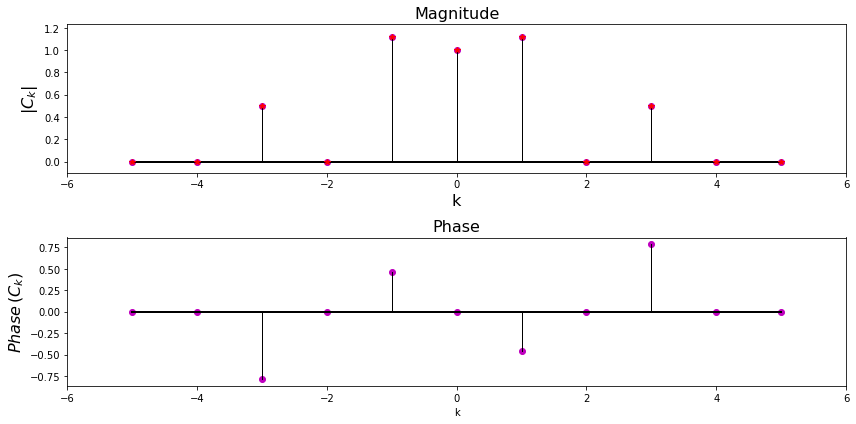

In [11]:
# . . Show the Fourier coefficients 
w = np.arange(-5, 6,1)
f = np.zeros(11,dtype=complex)
mag=np.zeros(11)
ang=np.zeros(11)

# . . Coefficients
f[0:1]=0.+0.j              # a_-5,a_-4
f[2]=np.sqrt(2.)/4.*(1-1j) # a_-3
f[3]=0.+0.j                # a_-2
f[4]=1.+0.5j               # a_-1
f[5]=1.+0.j                # a_0
f[6]=1-0.5j                # a_1
f[7]=0.+0.j                # a_2
f[8]=np.sqrt(2)/4.*(1+1j)  # a_3
f[9:10]=0.+0.j             # a_4,a_5

ii=0;
for z in np.nditer(f):
    x=z.real
    y=z.imag
    mag[ii]=np.sqrt(x**2+y**2)
    ang[ii]=np.arctan2(y,x)
    ii=ii+1

# . . Set plot size
plt.figure(figsize=(12, 6))

# . . Show magnitude
plt.subplot(2, 1, 1)
markerline, stemlines, baseline = plt.stem(w, mag,'-.') # . . returns 3 objects 
plt.setp(baseline, 'color', 'k', 'linewidth', 2) # . . Adjust the y=0 baseline
plt.setp(stemlines, 'color', 'k', 'linewidth', 1,'linestyle','-') # . . Adjust stem lines black (k) and solid (-)
plt.setp(markerline, 'color', 'm')# . . Adjust marker dots to be magenta (m)
plt.plot(w, mag,'r*')                  # . . Plot f(w)
plt.xlabel('k',fontsize=16)   # . . X label
plt.ylabel('$|C_k|$',fontsize=16)      # . . Y label
plt.title('Magnitude',fontsize=16)       # . . Title
plt.axis([w.min()-1,w.max()+1,-0.1,1.1*mag.max()])    # . . Set plot axis

# . . Show phase
plt.subplot(2, 1, 2)
markerline, stemlines, baseline = plt.stem(w, ang,'-.') # . . returns 3 objects 
plt.setp(baseline, 'color', 'k', 'linewidth', 2) # . . Adjust the y=0 baseline
plt.setp(stemlines, 'color', 'k', 'linewidth', 1,'linestyle','-') # . . Adjust stem lines black (k) and solid (-)
plt.setp(markerline, 'color', 'm')# . . Adjust marker dots to be magenta (m)
plt.xlabel('k')   # . . X label
plt.ylabel('$Phase\,(C_k)$',fontsize=16)      # . . Y label
plt.title('Phase',fontsize=16)       # . . Title
plt.axis([w.min()-1,w.max()+1,1.1*ang.min(),1.1*ang.max()])    # . . Set plot axis

plt.tight_layout() # . . Make it so that the subplots don't overlap
plt.show()                           # . . Show subplot

**Figure 10.  Illustrating the magnitude (top panel) and phase (bottom panel) of the signal plotted in Figure 9.**

### Example 2.3 - Rectangular ''Box car'' 

**Q:** Find the **complex exponential Fourier series** coefficients for $x(t)$, which is a periodic continuous-time signal of fundamental period $T$ and is a pulse with a width of $2T_0$ in each period. Over the specific period from $-T/2$ to $T/2$, $x(t)$ is:

$$
x(t) = \Pi_{T_0} =
\left\{
\begin{array}{ll}
1, & -T_0 < t < T_0\\
0, & {\rm otherwise}
\end{array}
\right.
\tag{30}
$$

with $T>T_0$.  Note that this function is commonly denoted $\Pi_a$ where $a$ is the width of the "box car".  This function is sometimes called the **top hat** or **rect** function.

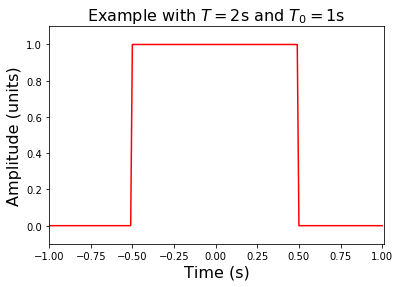

In [12]:
# Set up NumPy array with between 0s and 2s with sampling 0.005s
tmin,tmax,dt = -1.0,1.01,0.01 # Min/max t value and dt

# . . Define the t and x lines
t = np.arange(tmin, tmax, dt) 
x = np.zeros(len(t)) 

# . . Define our x(t)
x[50:150]=1.

# red dashes, blue squares and green triangles
plt.plot(t,x, 'r-')              # . . Plot x(t) as a red line
plt.xlabel('Time (s)',fontsize=16)           # . . X label
plt.ylabel('Amplitude (units)',fontsize=16)  # . . Y label
plt.title('Example with $T=2$s and $T_0=1$s',fontsize=16) # . . Title
plt.axis([tmin,tmax,1.1*x.min()-10*dt,1.1*x.max()]) # . . Set plot axis
plt.show()                       # . . Show plot below

**Figure 11. Illustration of the box-car function with period $T=2$s and box-car width of $T_0=1$s.**

**A:** Using the **inversion formula** for the complex Fourier series (i.e., equation 4) we obtain:

$$
C_k = \frac{1}{T} \int_{-T/2}^{T/2} x(t) {\rm e}^{-ik\omega_0 t} {\rm d}t = \frac{1}{T}\int_{-T_0}^{T_0} {\rm e}^{-ik\omega_0 t} {\rm d}t \tag{31}
$$

For $k=0$: We can immediately set the complex exponential term in equation 31 equal to one, which leaves the following integral:

$$
C_0 = \frac{1}{T}\int_{-T_0}^{T_0} 1 {\rm d}t = \frac{2T_0}{T} \tag{32}
$$

For $k\neq0$: We need to evaluate the full integral.

$$
C_k = \frac{1}{T}\int_{-T_0}^{T_0} {\rm e}^{-ik\omega_0 t} = -{\frac{1}{ik\omega_0 T}{\rm e}^{-ik\omega_0t}}\left|_{-T_0}^{T_0}\right. =  
\frac{{\rm e}^{ik\omega_0 T_0}-{\rm e}^{-ik\omega_0 T_0}}{ik\omega_0 T}  = 
\frac{2{\rm sin}(k\omega_0 T_0)}{k\omega_0 T}  \tag{33}
$$

where we have used the Euler expression for $\sin$ in the last step. Let's now rewrite $\omega_0$ in terms of $2\pi/T$

$$
C_k = 
\frac{2{\rm sin}(k\omega_0 T_0)}{k\omega_0 T}  = 
\frac{2T{\rm sin}(2\pi k T_0/T)}{2\pi k T}  = 
\frac{{\rm sin} (2\pi k T_0/T)}{k\pi}.  \tag{34}
$$

Now that we have the coefficients for the complex Fourier series, we can use equation 3 to generate the final expression:

$$
f(t) = \frac{2T_0}{T} + \sum_{k=-\infty \,(k\neq0)}^{\infty} \frac{{\rm sin} (2\pi k T_0/T)}{k\pi} {\rm e}^{i2 k \pi t/T} \tag{35}
$$

You may also have noticed that we can break up the full sum in equation 34a by using two different sums, one positive and one negative, which allows us to do the following mathematical manipulation:  

$$
\begin{eqnarray}
f(t) &=& 
\frac{2T_0}{T} + \sum_{k=-\infty\,(k\neq0)}^{\infty} \frac{{\rm sin} (2\pi k T_0/T)}{k\pi} {\rm e}^{i2 k \pi t/T} \tag{36a} \\
&=& 
\frac{2T_0}{T} + \sum_{k=-\infty}^{-1} \frac{{\rm sin} (2\pi k T_0/T)}{k\pi} {\rm e}^{i2 k \pi t/T}
+
\sum_{k=1}^{\infty} \frac{{\rm sin} (2\pi k T_0/T)}{k\pi} {\rm e}^{i2 k \pi t/T} \tag{36b}\\
&=&
\frac{2T_0}{T} + \sum_{k=1}^{\infty} \frac{{\rm sin} (-2\pi k T_0/T)}{-k\pi} {\rm e}^{-i2 k \pi t/T}
+
\sum_{k=1}^{\infty} \frac{{\rm sin} (2\pi k T_0/T)}{k\pi} {\rm e}^{i2 k \pi t/T} \tag{36c}\\
&=&
\frac{2T_0}{T} + \sum_{k=1}^{\infty} \frac{{\rm sin} (2\pi k T_0/T)}{k\pi} {\rm e}^{-i2 k \pi t/T}
+
\sum_{k=1}^{\infty} \frac{{\rm sin} (2\pi k T_0/T)}{k\pi} {\rm e}^{i2 k \pi t/T} \tag{36d}\\
&=&
\frac{2T_0}{T} + \sum_{k=1}^{\infty} \frac{{\rm sin} (2\pi k T_0/T)}{k\pi}  \left[ {\rm e}^{i2 k \pi t/T} +{\rm e}^{-i2 k \pi t/T}  \right]\tag{36e} \\
&=&\frac{2T_0}{T} + 2 \sum_{k=1}^{\infty} \frac{{\rm sin} (2\pi k T_0/T)}{k\pi}  \cos (2\pi k t/T). 
\tag{36f}
\end{eqnarray}
$$

Interesting, this complex Fourier series can be written purely with $\cos$ terms, which should make sense this $f(t)$ and $\cos$ are both symmetric functions!  Thus, one could have easily used a trigonometric Fourier Series and immediate set all of the $\sin$ terms to zero.

### The Sinc function 

Note that in equation 34a if $T_0 = T/2$ then the expression reduces to

$$
f(t) = 1 + \sum_{k=-\infty}^{\infty} \frac{{\rm sin} (\pi k)}{k\pi} {\rm e}^{i2 k \pi t/T}. \tag{37}
$$



You will encounter the following expression quite a few times in this course (and elsewhere):

$$ \mathrm{sinc}\,(ax) \equiv \frac{\mathrm{sin}\,(ax)}{ax}. \tag{38} $$

This function is commonly termed the [normalized sinc function](https://en.wikipedia.org/wiki/Sinc_function) and is very important in various things including low-pass filtering and interpolation.


### Numerical Example

Let's now plot this example up where we use $T=2.0$ s and $T_0=0.5$ s (i.e., from -0.5s to 0.5s).

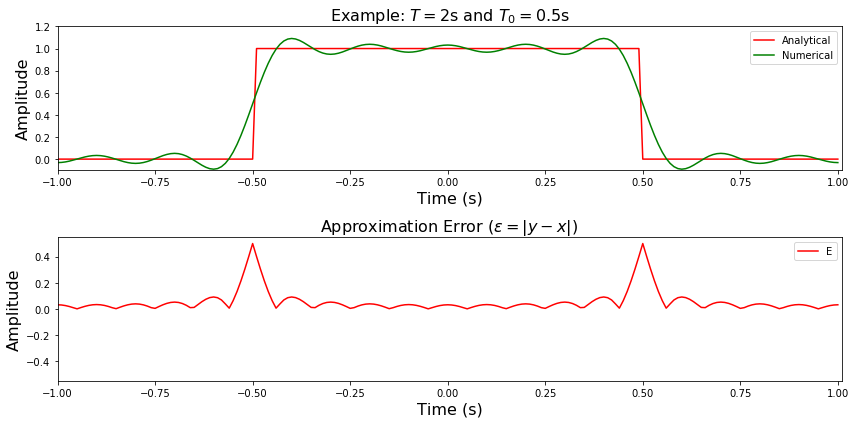

In [40]:
# Set up variables for arrays
tmin,tmax,dt = -1.0,1.01,0.01 # Minimum t, maximum t, and sampling rate t value
nc   = 10   # Number of approximation coefficients

# . . Define variables for this problem
T,T0 =2.0,0.5 # . . Define period and width of boxcar

# . . Define arrays
t   = np.arange(tmin, tmax, dt) 
x   = np.zeros(t.size) 
y   = np.zeros(t.size) 
err = np.zeros(t.size)

# . . Define initial function to be approximated 
x[51:150]=1. # Zeros elsewhere
#x[ 50]=0.5
#x[150]=0.5

# . . Define first Fourier Series coefficients
y = 2.*T0/T;

# . . Let's do all of the negative terms first (ie., from -nc to -1)
# . . Note that I have changed the sign of kk in this loop below
aline = range(1,nc,1) # . . Linear index from 1 to nc by 1
for kk in aline:
    CK = np.sin(-2.*np.pi*kk*T0/T)/(-kk*np.pi)
    y += CK*np.exp(-2j*np.pi*kk*t/T) # . . Accumlate solution

# . . Let's do all of the positive terms first (ie., from 1 to nc)
aline = range(1,nc,1) # . . Linear index from 1 to nc by 1
for kk in aline:
    CK = np.sin(2.*np.pi*kk*T0/T)/(kk*np.pi)
    y += CK*np.exp(2j*np.pi*kk*t/T) # . . Accumlate solution

# . . Calculate Approximation error  
err = np.sqrt((y.real-x)**2)

# . . Set plot size
plt.figure(figsize=(12, 6))
    
# red dashes, blue squares and green triangles
plt.subplot(2, 1, 1)
plt.plot(t,x, 'r-',t,y.real,'g-')              # . . Plot x(t) as a red line
plt.xlabel('Time (s)',fontsize=16)           # . . X label
plt.ylabel('Amplitude',fontsize=16)  # . . Y label
plt.title('Example: $T=2$s and $T_0=0.5$s',fontsize=16) # . . Title
plt.axis([tmin,tmax,1.1*y.real.min(),1.1*y.real.max()]) # . . Set plot axis
plt.legend(['Analytical','Numerical'])

plt.subplot(2, 1, 2)
plt.plot(t,err,'r-')              # . . Plot x(t) as a red line
plt.xlabel('Time (s)',fontsize=16)           # . . X label
plt.ylabel('Amplitude',fontsize=16)  # . . Y label
plt.title('Approximation Error ($\epsilon =|y-x|$) ',fontsize=16) # . . Title
plt.axis([tmin,tmax,-1.1*err.max(),1.1*err.max()]) # . . Set plot axis
plt.legend('Error')
plt.tight_layout() # . . Make it so that the subplots don't overlap
plt.show()

**Figure 12. Top panel: Illustration of the analytic box car (red line) along with the numerical approximation (green line).  The accuracy of the approximation can be changed by rerunning the simulation with different values of coefficients $nc$.  Also, I have commented out the values x[50]=x[150]=0.5.  It is informative to rerun the simulation with these uncommented.**

For the second plot we have defined the **residual error** (as a function of time) by computing $\epsilon=|y-x|$, where $x(t)$ is the original signal and $y(t)$ is our Fourier Series approximation of it.  Importantly, this eror measure allows us to visually inspect how well we are doing.  

Note that we could also define a **root-mean-squares (RMS) error** that is the ratio of the **RMS error** to the **RMS signal**:

$$ \epsilon_{RMS} = \sqrt{ \frac{\sum_{i=0}^{N-1}(y_i-x_i)^2}{\sum_{i=0}^{N-1} x_i^2}}.$$

Let's compute that for the given number of coefficients:

In [41]:
error = 100.*np.sqrt( np.sum((y.real-x)**2) / np.sum(x**2) )
print ("The percentage error of the Fourier Series approximation using ",nc," coefficients is: ",error, "%")

The percentage error of the Fourier Series approximation using  10  coefficients is:  14.4043556239 %


### Going to L'H$\hat{{\rm o}}$pital's

Note that in equation 31-33 we explictly separated the $k=0$ case from the $k\neq0$ case to make it easier to evaluate this coefficient. However, some of you may be concerned about what happens if we were to evaluate equation 33 with a $k=0$ in the denominator.  

It turns out that we can still derive the $k=0$ term from the $k\neq0$ expression using [L'H$\hat{{\rm o}}$pital's rule](https://en.wikipedia.org/wiki/L%27H%C3%B4pital%27s_rule):

$${\displaystyle \lim _{x\to c}{\frac {f(x)}{g(x)}}=\lim _{x\to c}{\frac {f'(x)}{g'(x)}}.} \tag{39}$$

Apply this rule to the expression in equation 33 leads to:

$$
\lim_{k \rightarrow 0} \frac{{\rm sin} (2\pi k T_0/T)}{k\pi} 
= \lim_{k\rightarrow0} 
\frac{ 
\frac{{\rm d}}{{\rm d}k} {\rm sin} (2\pi k T_0/T)
}
{\frac{{\rm d}}{{\rm d}k} k\pi}
=
\lim_{k \rightarrow 0} \frac{2\pi T_0/T {\rm cos}(2\pi k T_0/T)}{\pi}
=
\frac{2T_0}{T}, \tag{40}
$$

which is identical to equation 32 above. 

## But what is going on at the discontinuities?

Let's ask ourself a few questions about why we are getting such significant error at the location of the discontinuities.  

**QUESTIONS:**

1. Repeat the above numerical test using a different number of terms in the series (e.g., nc=51, nc=101, nc=201, nc=501 and nc=1001). 

2. Comment on the differences and how this changes the approximation error.  

3. What happens if you define your box car as follows?
   * x[50:150]=1. 
   * x[    50]=0.5 
   * x[   150]=0.5 
   
4. How many terms are required to have an approximation error $|\epsilon|<1$%?

The main reason you are seeing the approximation error not go to zero is that a Fourier Series convergest to the function $\overline{f}$, which is equal to the original function at **points of continuity** or to the average of the two limits at **points of discontinuity**:

$$
\overline{f} = \left\{
\begin{array}{ll}
\frac{1}{2}\left[ \lim_{x\to x^{-}_{0} } f(x)+\lim_{x\to x^+_0} f(x) \right],  & \quad \mathrm{for} -\frac{T}{2} < x_0 < \frac{T}{2} \\
\frac{1}{2} \left[ \lim_{x\rightarrow \frac{T}{2}^{-}_{0} } f(x)+\lim_{x \rightarrow T/2^{+}_{0} } f(x) \right], & \quad \mathrm{for} -\frac{T}{2} \lt x_0 \lt \frac{T}{2}\\
\end{array}
\right. \tag{41}
$$

Note also that the *ringing* is commonly referred to as [Gibbs Phenomena](https://en.wikipedia.org/wiki/Gibbs_phenomenon), which is an overshoot the of Fourier series (and other eigenfunction series) occurring at simple discontinuities.

Example of Removable Discontinuity | Example of Jump Discontinuity
- | - 
![alt](Fig/2.1_Discontinuity_removable.png) | ![alt](Fig/2.1_Discontinuity_jump.png)


**Figure 13.  Illustrating the different types of discontinuity. Left panel: Removable discontinuity. Right panel: Jump discontinuity.**

**QUESTION:** 

Show that a periodic signal defined by

$$s(t) = \left\{
\begin{array}{l}
t+\frac{\pi}{2}, \quad \mathrm{if}\, -\pi < t<0 \\
-t+\frac{\pi}{2}, \quad \mathrm{if}\, 0 < t< \pi \\
\end{array}
\right. \tag{42}
$$

where $r(t+2\pi)=r(t)$ has the following Fourier series:

$$r(t) = \frac{4}{\pi} \sum_{n=1}^{\infty} \frac{\mathrm{cos} (2n-1)t}{(2n-1)^2}  \tag{43}$$ 

or, equivalently,

$$r(t) = \frac{4}{\pi} \sum_{n=1,odd}^{\infty}\frac{ \mathrm{cos} \, n t }{n^2}\quad n=1,3,5,...  \tag{44}$$ 


# Fourier Series and ODE/PDEs

Fourier Series have important applications in ODEs and PDEs, as we will demonstrate with an example.  This will highlight the usefulness of Euler's and Fourier's methods insightful ideas into splitting up periodic fucntions into the smallest ones possible!

From previous (geo)physics classes we know that the forced oscillations of a body of mass $m$ on a spring of modulus $k$ are governed by the ODE:

$$ m\frac{d^2 y}{dt^2}+c\frac{dy}{dt}+ky = r(t) \tag{45}$$

where $y=y(t)$ is the displacement from rest, $c$ is the damping constant and $r(t)$ is the external force depending on time $t$.  If $r(t)$ is a sine or cosine function and if there is damping (i.e., $c>0$), then the steady-state solution is a harmonic oscillator with a frequency equal to that of $r(t)$.  However, if $r(t)$ is **not** a pure sine or cosine wave but is any other periodic function then the **steady state solution will be the superposition of harmonic oscillators with frequencies equal to that or $r(t)$ and its integer multiples**.

**Q:** Let's take the example in Question 2 just above. What is the steady state solution $y(t)$ of forced oscillations under a driving force of  

$$r(t) = \left\{
\begin{array}{l}
t+\frac{\pi}{2}, \quad \mathrm{if}\, -\pi < t<0 \\
-t+\frac{\pi}{2}, \quad \mathrm{if}\, 0 < t< \pi \\
\end{array}
\right.\tag{46}
$$

**A:** From the previous question we know that the Fourier is given by:

$$r(t) = \frac{4}{\pi} \sum_{n=1,odd}^{\infty}\frac{ \mathrm{cos} \, n t }{n^2}\quad n=1,3,5,...  \tag{47}$$ 

We know that the steady state solution of equation 45 is of the form:

$$y_n = A_n \mathrm{cos}\,nt +  B_n \mathrm{sin}\,nt. \tag{48} $$

Thus we can show that by substituting equation 48 into equation 45 we obtain coefficients:

$$A_n = \frac{4(k-mn^2)}{n^2\pi D_n}\quad \mathrm{and} \quad B_n=\frac{4c}{n\pi D_n}, \quad \mathrm{where} \quad D_n = (k-m n^2)^2+(cn)^2. \tag{49}$$

Since the ODE is linear, we expect the solution to be given by 

$$y = y_1+y_3+y_5+ ... \tag{40}$$

Let's plot an example where $m$=1, $c=$0.05 and $k$=25:

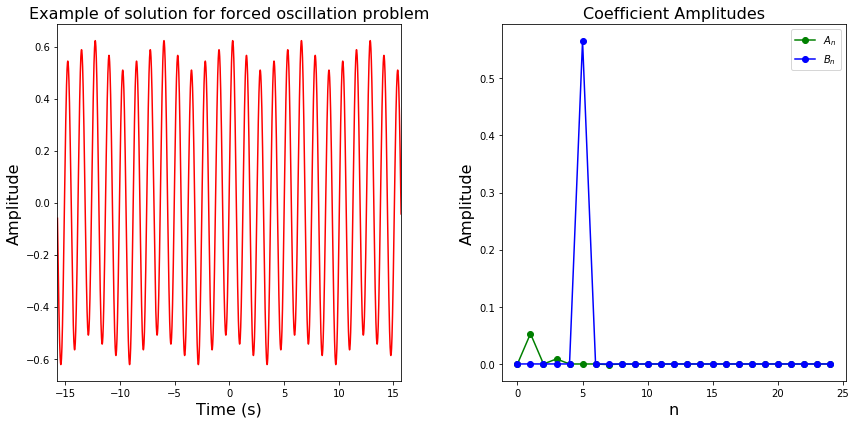

In [14]:
# Set up variables for arrays
tmin,tmax,dt = -5*np.pi,5*np.pi,0.01 # Minimum t, maximum t, and sampling rate t value

# . . Values
m,c,k=1,0.05,25

# . . Number of coefficients
nc=25

# . . Define arrays
t   = np.arange(tmin, tmax, dt) 
x = np.zeros(len(t))
An = np.zeros(nc)
Bn = np.zeros(nc)

for nn in range(1,nc,2):
    Dn = (k-m*nn**2)**2+(c*n)**2
    An[nn] = 4*(k-m*nn**2)/(nn**2*np.pi*Dn)
    Bn[nn] = 4*c/(nn*np.pi*Dn)
    x +=  An[nn]*np.cos(nn*t)+Bn[nn]*np.sin(nn*t)

# . . Set plot size
plt.figure(figsize=(12, 6))
    
# red dashes, blue squares and green triangles
plt.subplot(121)
plt.plot(t,x, 'r-')              # . . Plot x(t) as a red line
plt.xlabel('Time (s)',fontsize=16)           # . . X label
plt.ylabel('Amplitude',fontsize=16)  # . . Y label
plt.title('Example of solution for forced oscillation problem',fontsize=16) # . . Title
plt.axis([tmin,tmax,1.1*x.min(),1.1*x.max()]) # . . Set plot axis

plt.subplot(122)
plt.plot(range(0,nc,1),An,'g-o',range(0,nc,1),Bn,'b-o')
plt.legend(['$A_n$','$B_n$'])
plt.xlabel('n',fontsize=16)
plt.ylabel('Amplitude',fontsize=16)
plt.title('Coefficient Amplitudes',fontsize=16)

plt.tight_layout() # . . Make it so that the subplots don't overlap
**plt.show()

**Figure 14.  Illustration of the forced damped harmonic motion of a mass (m=1) on a spring (k=25) with damping (c=0.05). Left panel: Amplitude as a function of time.  Right panel: Coefficient amplitudes of solution.**

## The Heartbeat (Redux)

At the very start of this section we looked at the heartbeat signal.  Let's now look at what type of frequencies are in this using the Scipy toolbox's **periodogram** function.  Essentially, this is tool that allow use to look at the frequency structure of discrete (and ideally periodic!) functions. 

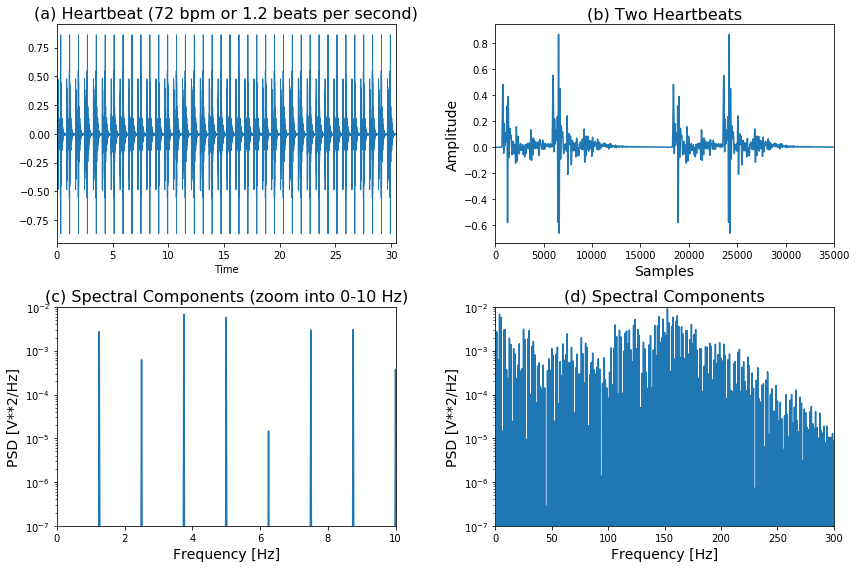

In [36]:
xx, sr = librosa.load('wav/heartbeat-05.wav')

## . . Compute periodogram
f, Pxx_den = signal.periodogram(xx, sr)

## . . Plot full time series
plt.figure(figsize=(12, 8))
plt.subplot(221)
librosa.display.waveplot(xx, sr=sr);
plt.title('(a) Heartbeat (72 bpm or 1.2 beats per second)',fontsize=16)

## . . Plot one period of the time series
plt.subplot(222)
plt.plot(xx[0:35000])
plt.xlabel('Samples',fontsize=14)
plt.ylabel('Amplitude',fontsize=14)
plt.title('(b) Two Heartbeats',fontsize=16)
plt.xlim([0, 35000])

## . . Plot estimate of spectral components
plt.subplot(223)
plt.semilogy(f, Pxx_den)
plt.xlim([0, 10])
plt.ylim([1e-7, 1e-2])
plt.xlabel('Frequency [Hz]',fontsize=14)
plt.ylabel('PSD [V**2/Hz]',fontsize=14)
plt.title('(c) Spectral Components (zoom into 0-10 Hz)',fontsize=16)

## . . Plot estimate of spectral components
plt.subplot(224)
plt.semilogy(f, Pxx_den)
plt.xlim([0, 300])
plt.ylim([1e-7, 1e-2])
plt.xlabel('Frequency [Hz]',fontsize=14)
plt.ylabel('PSD [V**2/Hz]',fontsize=14)
plt.title('(d) Spectral Components',fontsize=16)

plt.tight_layout() # . . Make it so that the subplots don't overlap
plt.show()

**Figure 15.  Illustration of the heartbeat signal. (a) Heartbeat time series that we examined at the start of the section.  We can count the number of heartbeats and determine that this recording has approximately 72 beats per minute, or one beat every 1.2 seconds. (b) Zoom in of the first two heart beats.  You can see the "lub-DUB" like signals where the "lub" is the sound of the tricuspid and mitral valves closing, and the "DUB" is the sound of the aortic and pulmonary valves closing.   You can also observe a lot of high-frequency components within this signal.(c) the spectral component estimate (in a semilogy graph) using the *periodogram* estimate of the power spectral density.  Sure enough, the lowest frequency that makes a contribution is roughly 1.2 Hz (or the rate of the heartbeat)! Effectively, this panel shows the spectral contributions of the first eight coefficients in a Fourier Series that could be used to reconstruct a single heart beat!. (d) Coefficients out to 300 Hz.**

## Parting thoughts

Examining Fourier Series is a good introduction to thinking about the differences in the time and frequency domain (well ... conjugate Fourier domains in general).  It is important to emphasize that the harmonic analysis you saw here is for examining **periodic** and **continuous-time** functions and looking at their **discrete** Fourier components, which represent a sequence.  

Because many of the signals were examine are both **discrete** and of **finite** duration, we need additional tools that account for these two key differences.  In particular, you will be examining the **Discrete Fourier Transform (DFT)** later on in this course that allows you to find the Fourier spectrum. 

In addition to their usefulness in solving ODEs and PDEs, you will likely encounter Fourier Series when using symbolic analysis using packages like Mathematics, Matlab (Symbolic tool kit) and indeed Python (Simpy).  You will also use them when designing specific output waveforms that are used in exploration geophysics instrumentation. 

Next step ... Fourier Analysis!

## References

1. Arfken, G. "Fourier Series." Ch. 14 in Mathematical Methods for Physicists, 3rd ed. Orlando, FL: Academic Press, pp. 760-793, 1985.

2. Boas, M.L.,  Mathematical Methods in the Physical Science, John Wiley, 2006.

3. Byerly, W. E. An Elementary Treatise on Fourier's Series, and Spherical, Cylindrical, and Ellipsoidal Harmonics, with Applications to Problems in Mathematical Physics. New York: Dover, 1959.

4. Davis, H. F. Fourier Series and Orthogonal Functions. New York: Dover, 1963.

5. James, J.F. 2011, A Student's Guide to Fourier Transforms, 3rd ed, Cambridge University Press.

6. Whittaker, E. T. and Robinson, G. "Practical Fourier Analysis." Ch. 10 in The Calculus of Observations: A Treatise on Numerical Mathematics, 4th ed. New York: Dover, pp. 260-284, 1967.